In [7]:
import numpy as np
import pandas as pd
import scipy.stats as st

from scipy.stats import linregress
import gmaps

import json
import requests
from pprint import pprint

import matplotlib.pyplot as plt

import requests

from config import gkey
gmaps.configure(api_key=gkey)

In [11]:
## Analysis and visualization of hardship data

In [2]:
filepath='Resources/hardship_data_heatmap.csv'
hardship_data_heatmap= pd.read_csv(filepath,index_col=0)
hardship_data_heatmap

,Name,GEOID,Population,Longitude,Latitude,2015-2019,2011-2015,Difference between Time Frames
0,Rogers Park,1,52772,-87.670171,42.009630,61.630585,64.741637,23.096090
1,Norwood Park,10,41109,-87.803451,41.985248,22.139738,25.624614,22.722266
2,Jefferson Park,11,26201,-87.771165,41.978836,38.304424,47.049867,17.461699
3,Forest Glen,12,19579,-87.758358,41.993938,16.696647,16.568261,26.335528
4,North Park,13,17522,-87.723578,41.983651,50.364721,46.624422,29.947440
...,...,...,...,...,...,...,...,...
72,Morgan Park,75,21714,-87.669062,41.689729,53.120251,53.940465,25.386928
73,O'Hare,76,14416,-87.893699,41.975696,58.918869,60.423957,24.702054
74,Edgewater,77,47343,-87.663419,41.986719,26.803564,31.441967,21.568738
75,Near North Side,8,95467,-87.633318,41.899611,3.920002,8.996390,21.130754


In [3]:
filepath='Resources/hardship_locations_heatmap.csv'
hardship_locations_data_heatmap= pd.read_csv(filepath,index_col=0)
hardship_locations_data_heatmap

,Latitude,Longitude
0,42.009630,-87.670171
1,41.985248,-87.803451
2,41.978836,-87.771165
3,41.993938,-87.758358
4,41.983651,-87.723578
...,...,...
72,41.689729,-87.669062
73,41.975696,-87.893699
74,41.986719,-87.663419
75,41.899611,-87.633318


In [4]:
hardship = hardship_data_heatmap["Difference between Time Frames"].astype(float)
maxhardship = hardship.max()
locations = hardship_data_heatmap[["Latitude", "Longitude"]].astype(float)

figure_layout = {
   'width': '400px',
   'width': '300px',
   'border': '1px solid black',
   'padding': '1px'
}


fig = gmaps.figure(layout=figure_layout)
hardship_layer = gmaps.heatmap_layer(locations, weights=hardship, dissipating = False, 
                                     max_intensity = maxhardship, point_radius = .03)

fig.add_layer(hardship_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='420px', padding='1px', width='300px'))

In [ ]:
## Analysis and visualization of suicide and vacancy data

In [5]:
filepath = 'Resources/suicide_vacant_2011.csv'
suicide_vacant_2011 = pd.read_csv(filepath, index_col =0)
suicide_vacant_2011

,Suicide Mortality Rate,Vacant Housing Units
0,7.4,13.829714
1,8.9,8.674336
2,15.5,7.264864
3,7.3,7.156233
4,4.9,5.767573
...,...,...
72,9.7,9.896714
73,4.4,5.682359
74,9.4,10.609375
75,9.9,13.527900


y = -0.97x + 20.16
The r-value is: -0.42353804536783835


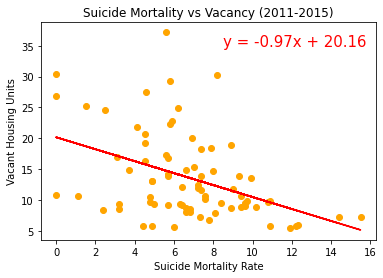

In [8]:
x_values = suicide_vacant_2011['Suicide Mortality Rate']
y_values = suicide_vacant_2011['Vacant Housing Units']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values,color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8.5,35),fontsize=15,color="red")
plt.xlabel('Suicide Mortality Rate')
plt.ylabel('Vacant Housing Units')
plt.title("Suicide Mortality vs Vacancy (2011-2015)")

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {correlation[0]}")

plt.savefig('Images/suicide_vacant_2011.png',format='png')

plt.show() 

In [9]:
filepath = 'Resources/suicide_vacant_2019.csv'
suicide_vacant_2019 = pd.read_csv(filepath, index_col =0)
suicide_vacant_2019

,Suicide Mortality Rate,Vacant Housing Units
0,9.9,10.638248
1,12.7,4.354325
2,11.8,7.927394
3,3.5,4.115101
4,11.7,6.047908
...,...,...
72,7.0,10.283461
73,8.7,5.102151
74,11.1,9.192521
75,11.9,13.589030


y = -0.61x + 16.59
The r-value is: -0.3764039514733627


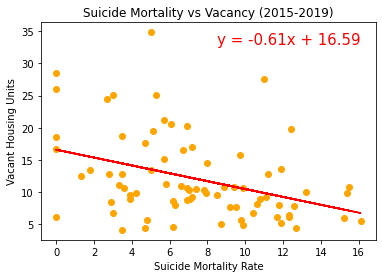

In [10]:
x_values = suicide_vacant_2019['Suicide Mortality Rate']
y_values = suicide_vacant_2019['Vacant Housing Units']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values,color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8.5,33),fontsize=15,color="red")
plt.xlabel('Suicide Mortality Rate')
plt.ylabel('Vacant Housing Units')
plt.title("Suicide Mortality vs Vacancy (2015-2019)")

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {correlation[0]}")

plt.savefig('Images/suicide_vacant_2019.png',format='png')

plt.show() 

In [12]:
## Analysis and visualization of school data

In [13]:
file_path = "Resources/cleaned_CSSEMH.csv"
#Drug Induced Mortality
school_df= pd.read_csv(file_path)
school_df

,Unnamed: 0,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME
0,1,West Ridge,7.8,17.2,20.8,38.5,23040
1,3,Lincoln Square,3.4,10.9,13.4,25.5,37524
2,4,North Center,0.3,7.5,4.5,26.2,57123
3,5,Lake View,1.1,11.4,2.6,17.0,60058
4,6,Lincoln Park,0.8,12.3,3.6,21.5,71551
...,...,...,...,...,...,...,...
71,73,Mount Greenwood,1.0,3.4,4.3,36.8,34381
72,74,Morgan Park,0.8,13.2,10.8,40.3,27149
73,75,O'Hare,3.6,15.4,10.9,30.3,25828
74,76,Edgewater,4.1,18.2,9.7,23.8,33385


In [14]:
file_path2 = "Resources/NSICA.csv"
#Neighborhood Safety
NSICA_df= pd.read_csv(file_path2)
NSICA_df

,Category,Full population
0,2015,1578000.0
1,2016,1494000.0
2,2017,1613000.0
3,2018,1629000.0
4,2019,NaN
5,2020,1364000.0
6,2021,1298000.0


In [15]:
file_path3 = "Resources/CBICA.csv"
#Community Belonging in Chicago All Ages
belonging_df= pd.read_csv(file_path3)
belonging_df

,Category,Full population
0,2015,1358000.0
1,2016,1245000.0
2,2017,1255000.0
3,2018,1324000.0
4,2019,NaN
5,2020,970000.0
6,2021,923000.0


In [16]:
file_path4 = "Resources/SSRIC.csv"
#School Safety Rate
safety_df= pd.read_csv(file_path4)
safety_df

,Category,Full population
0,2001,16.0
1,2003,13.6
2,2005,10.5
3,2007,12.3
4,2009,15.1
5,2011,10.8
6,2013,12.9
7,2015,NaN
8,2017,10.0
9,2019,12.8


In [17]:
file_path5 = "Resources/SFRIC.csv"
SFRIC_df= pd.read_csv(file_path5)
SFRIC_df.head()

,Category,Full population
0,2001,18.5
1,2003,19.3
2,2005,19.5
3,2007,17.4
4,2009,20.6


In [18]:
file_path6 = "Resources/SBRIC.csv"
SBRIC_df= pd.read_csv(file_path6)
SBRIC_df.head()

,Category,Full population
0,2009,11.1
1,2011,12.8
2,2013,13.0
3,2015,NaN
4,2017,15.2


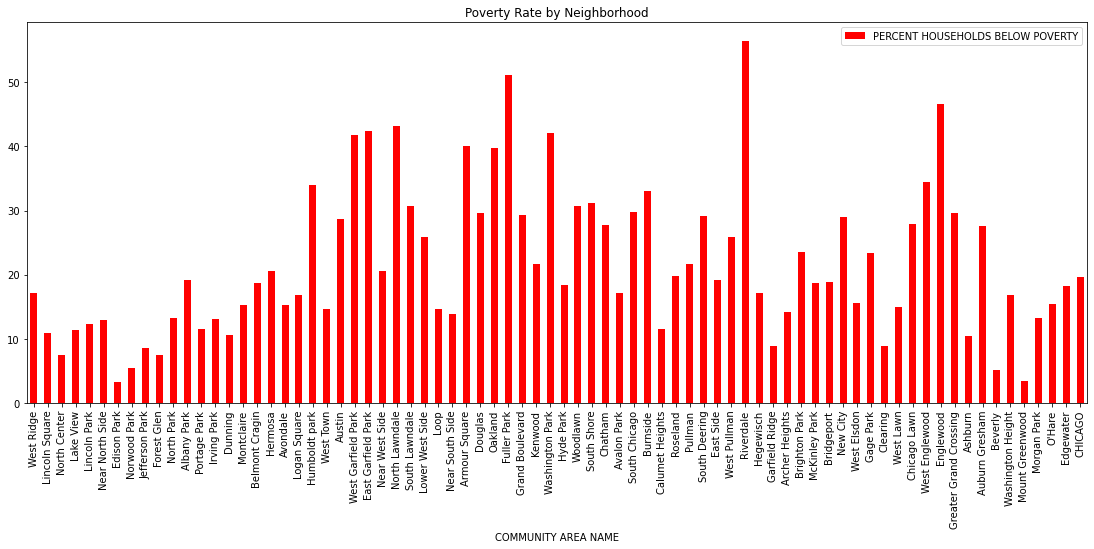

In [20]:
plt.rcParams['figure.figsize'] = [19, 7]
school_df.plot(kind='bar',x='COMMUNITY AREA NAME',y='PERCENT HOUSEHOLDS BELOW POVERTY', color='red')
plt.title("Poverty Rate by Neighborhood")
plt.show()

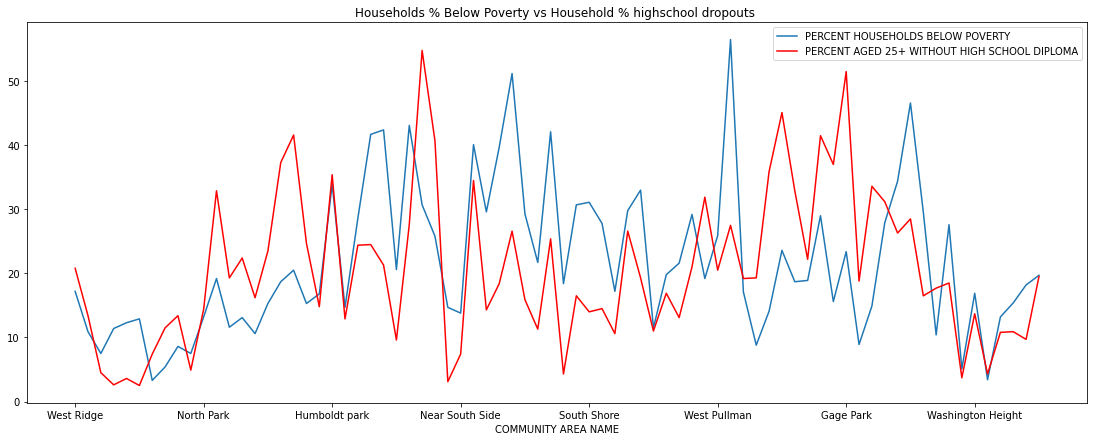

In [21]:
ax = plt.gca()
school_df.plot(kind='line',x='COMMUNITY AREA NAME',y='PERCENT HOUSEHOLDS BELOW POVERTY',ax=ax)
school_df.plot(kind='line',x='COMMUNITY AREA NAME',y='PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', color='red', ax=ax)
plt.title("Households % Below Poverty vs Household % highschool dropouts ")
plt.savefig('Images/DEEZ1.png',format='png')
plt.show()

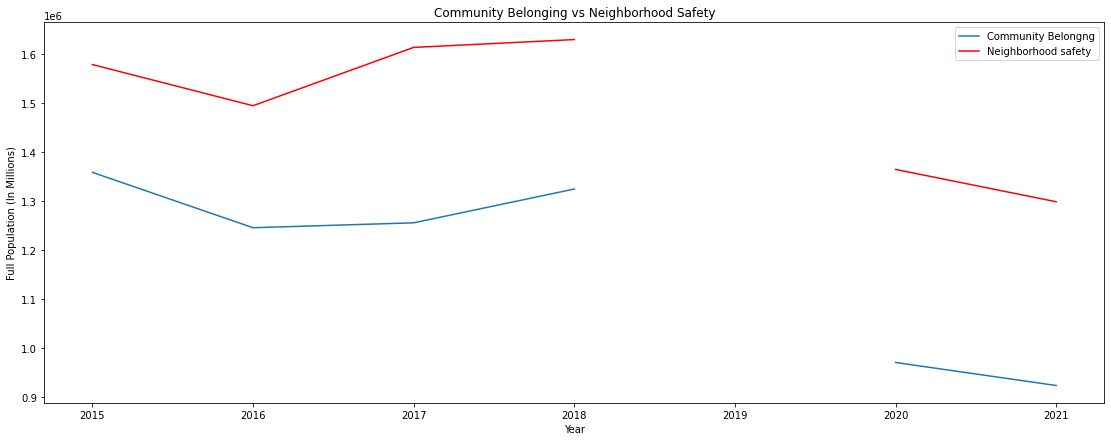

In [22]:
ax = plt.gca()
belonging_df.plot(kind='line',x='Category',y='Full population',ax=ax)
NSICA_df.plot(kind='line',x='Category',y='Full population', color='red', ax=ax)
plt.xlabel("Year")
plt.ylabel("Full Population (In Millions)")
plt.legend(['Community Belongng','Neighborhood safety'],loc='best')
plt.title("Community Belonging vs Neighborhood Safety")
plt.savefig('Images/DEEZ2.png',format='png')
plt.show()

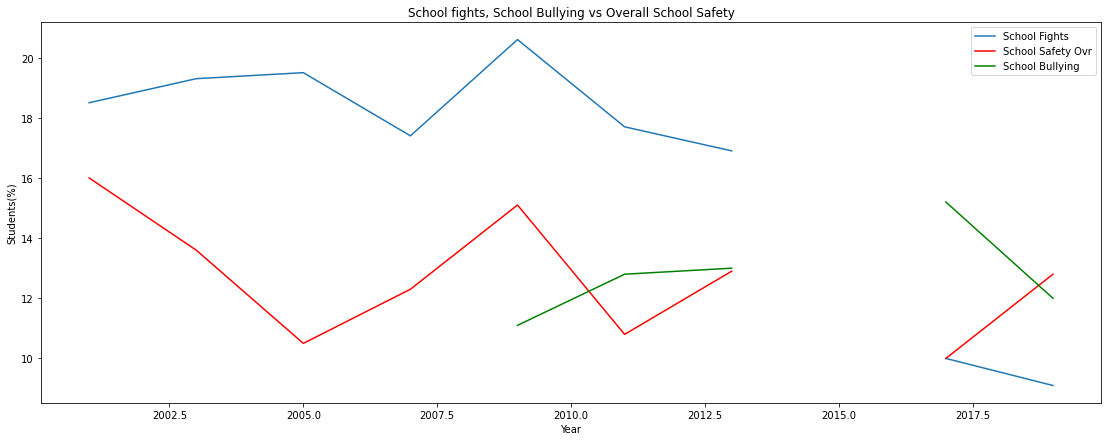

In [23]:
ax = plt.gca()
SFRIC_df.plot(kind='line',x='Category',y='Full population',ax=ax)
safety_df.plot(kind='line',x='Category',y='Full population', color='red', ax=ax)
SBRIC_df.plot(kind='line',x='Category',y='Full population', color='Green', ax=ax)
plt.xlabel("Year")
plt.ylabel("Students(%)")
plt.legend(['School Fights','School Safety Ovr','School Bullying'],loc='best')
plt.title("School fights, School Bullying vs Overall School Safety")
plt.savefig('Images/DEEZ3.png',format='png')
plt.show()

In [24]:
## Analysis and visualization of youth diet and exercise data

In [25]:
#Load in data from csv
filepath='Resources/youth_diet_exercise_alcohol.csv'
youth_diet_exercise_alcohol_df= pd.read_csv(filepath,index_col=0)
youth_diet_exercise_alcohol_df

,2001,2003,2005,2007,2009,2011,2013,2017,2019
YRFV,26900.0,16300.0,18200.0,16000.0,19700.0,16300.0,13600.0,11900.0,10600.0
YRPA,NaN,NaN,10300.0,13100.0,15500.0,14100.0,14900.0,11400.0,10000.0
YRBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5900.0,5000.0


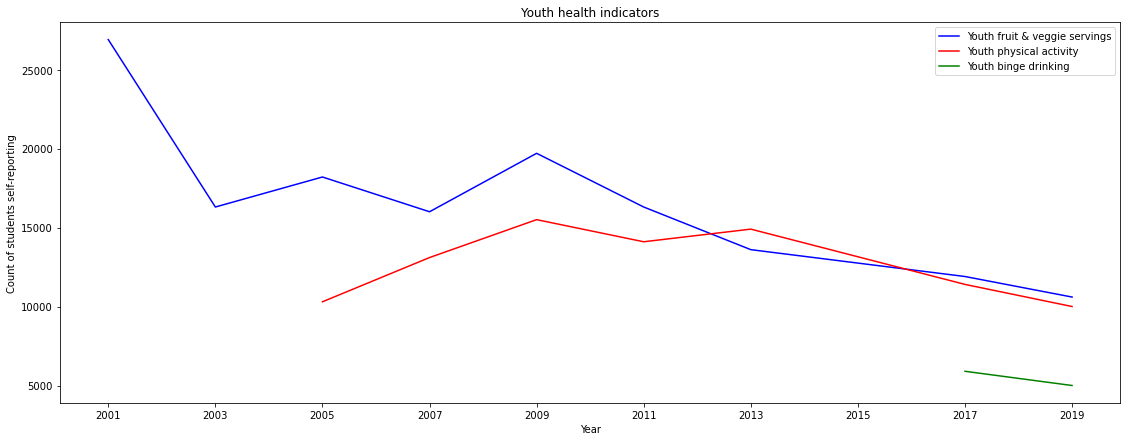

In [26]:
#Plot time series
x = [2001,2003,2005,2007,2009,2011,2013,2017,2019]
y = youth_diet_exercise_alcohol_df.loc['YRFV']
x2 = [2005,2007,2009,2011,2013,2017,2019]
y2=youth_diet_exercise_alcohol_df.loc['YRPA'][2:]
x3 =[2017,2019]
y3 = youth_diet_exercise_alcohol_df.loc['YRBD'][7:]

plt.xticks(range(2001,2020,2))
plt.xlabel("Year")
plt.ylabel("Count of students self-reporting")
plt.title("Youth health indicators")
plt.plot(x,y,'b',x2,y2,'r',x3,y3,'g')
plt.legend(['Youth fruit & veggie servings','Youth physical activity','Youth binge drinking'],loc='best')
plt.savefig('Images/youth_health_indicators.png',format='png')


The r-value is: 0.4644794217649582


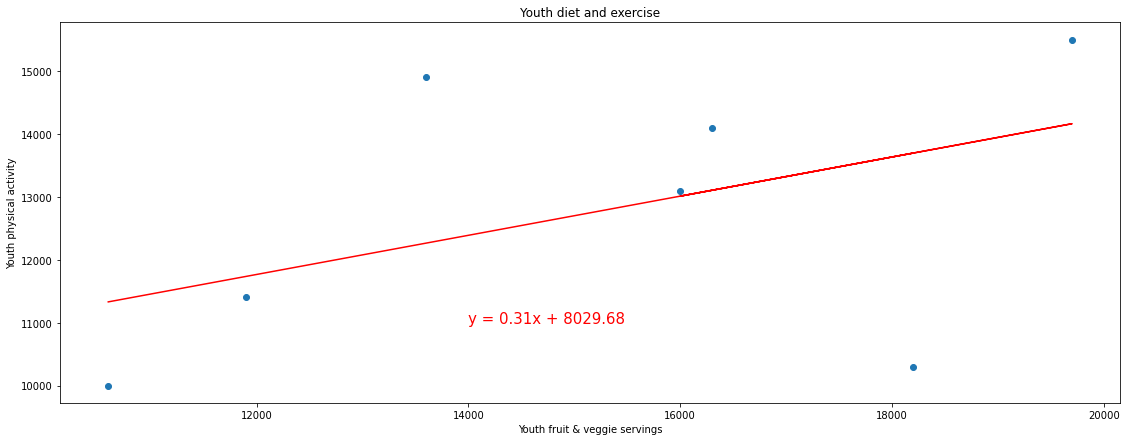

In [27]:
#Make scatter plot and regression
x_values = youth_diet_exercise_alcohol_df.loc['YRFV'][2:]
y_values = youth_diet_exercise_alcohol_df.loc['YRPA'][2:]
correlation = st.pearsonr(x_values,y_values)

plt.xlabel("Youth fruit & veggie servings")
plt.ylabel("Youth physical activity")
plt.title("Youth diet and exercise")
plt.scatter(x_values,y_values)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (14000,11000),fontsize=15,color="red")
plt.savefig("Images/youthdietandexercise.png", format = 'png')

plt.show()

In [28]:
# Next question I'd want to ask is what factors can be tweaked to increase this correlation and optimize these 
# indicators?

In [29]:
## Analysis and visualization of metastudy data

In [30]:
# Load in period coverage data from csv
filepath="Resources/PeriodCoverage.csv"
period_cov_df= pd.read_csv(filepath,index_col=0)
period_cov_df

,Indicator Count
Year/Range,
2020,139
2015-2019,94
2019,150
2014-2018,96
2018,168
...,...
2018.05,3
2018.04,3
2018.03,3


In [31]:
# Turn dataframe back into dictionary
period_cov_dict = period_cov_df.to_dict()
period_cov_dict=period_cov_dict['Indicator Count']
period_cov_dict

{'2020': 139,
 '2015-2019': 94,
 '2019': 150,
 '2014-2018': 96,
 '2018': 168,
 '2017': 225,
 '2016': 203,
 '2015': 184,
 '2014': 175,
 '2013': 161,
 '2012': 140,
 '2011': 158,
 '2010': 131,
 '2009': 107,
 '2008': 87,
 '2007': 105,
 '2006': 87,
 '2005': 103,
 '2004': 87,
 '2003': 101,
 '2002': 87,
 '2001': 101,
 '2000': 87,
 '2020-2021': 52,
 '2021': 68,
 '2017-2021': 9,
 '2016-2020': 39,
 '2013-2017': 32,
 '2012-2016': 29,
 '2011-2015': 34,
 '2010-2014': 31,
 '2009-2013': 34,
 '2008-2012': 31,
 '2007-2011': 24,
 '2006-2010': 28,
 '2005-2009': 17,
 '2004-2008': 20,
 '2003-2007': 16,
 '2002-2006': 13,
 '2001-2005': 16,
 '2000-2004': 13,
 '1999-2003': 16,
 '1998-2002': 13,
 '1997-2001': 10,
 '1996-2000': 13,
 '1995-1999': 13,
 '1999': 12,
 '1994-1998': 17,
 '1998': 12,
 '1993-1997': 13,
 '1997': 12,
 '1992-1996': 10,
 '1996': 12,
 '1991-1995': 13,
 '1995': 10,
 '1990-1994': 13,
 '1994': 10,
 '1989-1993': 17,
 '1993': 10,
 '1988-1992': 13,
 '1992': 10,
 '1987-1991': 10,
 '1991': 10,
 '1986

<BarContainer object of 36 artists>

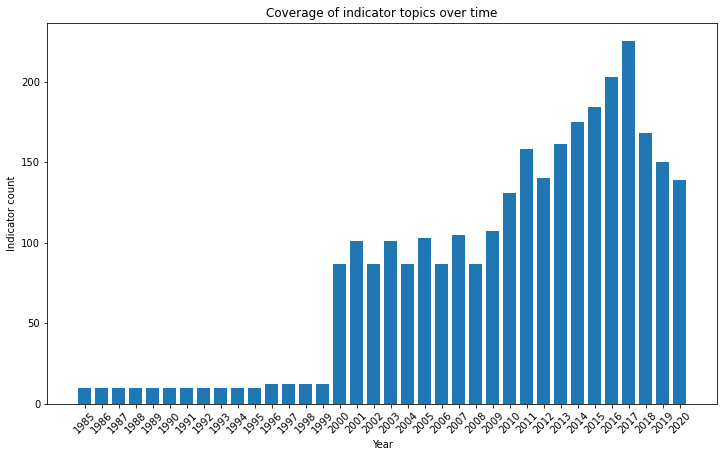

In [32]:
# Now to make a bar chart from that data...
# Let's first clean up that data to only keep the single year keys...

single_yr_cov_dict = {}
single_yr_keys = [year for year in range(1985,2021)]

for year in single_yr_keys:
    single_yr_cov_dict[year] = period_cov_dict[str(year)]


plt.figure(figsize=(12,7))
plt.xticks(rotation = 45)
display(plt.bar(range(len(single_yr_cov_dict)),list(single_yr_cov_dict.values()),
       tick_label = list(single_yr_cov_dict.keys())))
plt.xlabel("Year")
plt.ylabel("Indicator count")
plt.title("Coverage of indicator topics over time")
plt.savefig('Images/single_year_coverage_bars.png',format='png')

In [33]:
# Load in relevant indicators data from csv
data_csv_file = "Resources/fullcitydata2010to2020.csv"
cleaned_data_df= pd.read_csv(data_csv_file)
cleaned_data_df

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
0,670.0,25.5,13759.0000,147.0,5.6,345.0,15.3,0.0000,26213.0000,4479.0,...,31.9,14222.0000,880.0,38.3,171.0,6.3,5615.0,239.8,0.0,28414.0000
1,636.0,24.7,12409.0000,172.0,6.6,370.0,16.3,0.0000,26427.0000,4316.0,...,26.6,13988.0000,886.0,38.3,160.0,5.8,5609.0,239.0,11.0,26829.0000
2,791.0,29.9,12277.0000,163.0,6.2,308.0,13.7,0.0000,22757.0000,4414.0,...,28.4,13492.0000,906.0,39.1,193.0,7.2,5707.0,242.4,0.0,26271.0000
3,816.0,31.1,12117.0000,188.0,7.3,350.0,15.4,431.0000,17881.0000,4513.0,...,23.7,11836.0000,946.0,40.7,205.0,7.5,5666.0,241.0,16.4,25710.0000
4,790.0,30.0,12532.0000,212.0,8.1,439.0,19.3,461.0000,14560.0000,4420.0,...,31.1,9804.0000,968.0,41.4,199.0,7.3,5725.0,243.5,32.9,24140.0000
5,824.0,31.2,13094.0000,224.0,8.4,561.0,24.7,536.0000,13170.0000,4523.0,...,29.3,9643.0000,1048.0,45.4,183.0,6.7,6097.0,258.6,11.0,24701.0000
6,1127.0,42.4,42.9204,261.0,9.8,593.0,26.1,0.0000,46.2960,4420.0,...,32.8,90.7410,1065.0,46.0,197.0,7.2,6074.0,256.9,5.5,145.3528
7,1255.0,47.4,55.5552,223.0,8.5,537.0,23.5,0.9076,33.9518,4246.0,...,30.4,92.5604,1190.0,51.7,219.0,7.9,6107.0,258.2,0.0,160.0976
8,1295.0,49.0,61.7652,243.0,9.3,499.0,22.6,1.1982,20.1546,4108.0,...,25.7,87.5844,1165.0,50.9,202.0,7.2,6109.0,262.9,5.5,167.9396
9,1320.0,50.0,55.4120,245.0,9.5,443.0,20.1,0.0000,22.5152,4152.0,...,27.5,61.6978,1188.0,52.3,215.0,7.8,5997.0,258.2,0.0,126.9860


In [34]:
# Get correlation matrix
cleaned_data_df.corr()

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
VRAC,1.000000,0.999916,-0.872107,0.900024,0.909422,0.584813,0.628579,-0.382338,-0.858794,-0.830383,...,-0.133388,-0.875248,0.972865,0.974163,0.832279,0.797121,0.891143,0.921501,-0.433797,-0.877633
VRACR,0.999916,1.000000,-0.871860,0.898971,0.908789,0.581020,0.625044,-0.384312,-0.856687,-0.835576,...,-0.141493,-0.873963,0.972979,0.974476,0.829884,0.793923,0.888586,0.919947,-0.432747,-0.876990
CZA,-0.872107,-0.871860,1.000000,-0.786278,-0.793688,-0.648315,-0.679550,0.544850,0.933655,0.779417,...,-0.007980,0.973700,-0.850118,-0.850434,-0.713356,-0.656792,-0.782044,-0.793783,0.474724,0.997023
VRAL,0.900024,0.898971,-0.786278,1.000000,0.998738,0.788911,0.820493,-0.104886,-0.873724,-0.648834,...,-0.024801,-0.856062,0.912410,0.904030,0.723751,0.689675,0.919357,0.925804,-0.144481,-0.812068
VRALR,0.909422,0.908789,-0.793688,0.998738,1.000000,0.766284,0.799584,-0.110187,-0.876870,-0.670228,...,-0.058059,-0.860190,0.919715,0.912049,0.740812,0.705428,0.910090,0.921387,-0.142684,-0.817975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSUR,0.797121,0.793923,-0.656792,0.689675,0.705428,0.369804,0.394978,-0.054610,-0.741836,-0.510400,...,-0.127963,-0.697380,0.773446,0.763058,0.993634,1.000000,0.647918,0.649367,-0.173051,-0.666879
VRTO,0.891143,0.888586,-0.782044,0.919357,0.910090,0.837578,0.865543,-0.171099,-0.865406,-0.630419,...,0.033805,-0.849931,0.937285,0.932065,0.685228,0.647918,1.000000,0.990187,-0.373617,-0.810611
VRTOR,0.921501,0.919947,-0.793783,0.925804,0.921387,0.782232,0.818452,-0.208199,-0.861363,-0.703187,...,-0.037164,-0.853044,0.957666,0.956357,0.690697,0.649367,0.990187,1.000000,-0.390341,-0.819812
CDTBR,-0.433797,-0.432747,0.474724,-0.144481,-0.142684,-0.076928,-0.104214,0.765167,0.262198,0.415551,...,-0.021132,0.346414,-0.372437,-0.397262,-0.180870,-0.173051,-0.373617,-0.390341,1.000000,0.442792


In [35]:
# Create dataframe of year-to-year changes in data
data_changes_df = cleaned_data_df.diff().drop(index=0)
data_changes_df

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
1,-34.0,-0.8,-1350.0000,25.0,1.0,25.0,1.0,0.0000,214.0000,-163.0,...,-5.3,-234.0000,6.0,0.0,-11.0,-0.5,-6.0,-0.8,11.0,-1585.0000
2,155.0,5.2,-132.0000,-9.0,-0.4,-62.0,-2.6,0.0000,-3670.0000,98.0,...,1.8,-496.0000,20.0,0.8,33.0,1.4,98.0,3.4,-11.0,-558.0000
3,25.0,1.2,-160.0000,25.0,1.1,42.0,1.7,431.0000,-4876.0000,99.0,...,-4.7,-1656.0000,40.0,1.6,12.0,0.3,-41.0,-1.4,16.4,-561.0000
4,-26.0,-1.1,415.0000,24.0,0.8,89.0,3.9,30.0000,-3321.0000,-93.0,...,7.4,-2032.0000,22.0,0.7,-6.0,-0.2,59.0,2.5,16.5,-1570.0000
5,34.0,1.2,562.0000,12.0,0.3,122.0,5.4,75.0000,-1390.0000,103.0,...,-1.8,-161.0000,80.0,4.0,-16.0,-0.6,372.0,15.1,-21.9,561.0000
6,303.0,11.2,-13051.0796,37.0,1.4,32.0,1.4,-536.0000,-13123.7040,-103.0,...,3.5,-9552.2590,17.0,0.6,14.0,0.5,-23.0,-1.7,-5.5,-24555.6472
7,128.0,5.0,12.6348,-38.0,-1.3,-56.0,-2.6,0.9076,-12.3442,-174.0,...,-2.4,1.8194,125.0,5.7,22.0,0.7,33.0,1.3,-5.5,14.7448
8,40.0,1.6,6.2100,20.0,0.8,-38.0,-0.9,0.2906,-13.7972,-138.0,...,-4.7,-4.9760,-25.0,-0.8,-17.0,-0.7,2.0,4.7,5.5,7.8420
9,25.0,1.0,-6.3532,2.0,0.2,-56.0,-2.5,-1.1982,2.3606,44.0,...,1.8,-25.8866,23.0,1.4,13.0,0.6,-112.0,-4.7,-5.5,-40.9536
10,511.0,19.0,0.2864,70.0,2.5,84.0,3.8,3.8136,40.9304,-96.0,...,-0.2,-21.3528,178.0,7.7,13.0,0.5,414.0,17.3,0.0,-22.8458


In [36]:
# Create correlation matrix of changes
diff_corr_df = data_changes_df.corr()
diff_corr_df

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
VRAC,1.000000,0.999097,-0.365566,0.490736,0.471262,0.131958,0.137535,-0.416356,-0.247628,-0.162311,...,0.177895,-0.290570,0.646089,0.618923,0.460147,0.456601,0.515720,0.483577,-0.268232,-0.351065
VRACR,0.999097,1.000000,-0.366913,0.499071,0.482421,0.135582,0.140501,-0.410030,-0.237121,-0.184364,...,0.151296,-0.287191,0.654944,0.627412,0.447562,0.439779,0.508795,0.477879,-0.250994,-0.349976
CZA,-0.365566,-0.366913,1.000000,-0.256644,-0.273029,-0.037812,-0.028629,0.813164,0.871793,0.227637,...,-0.276100,0.955800,0.210716,0.237148,-0.168904,-0.149038,0.249988,0.303592,0.108989,0.994326
VRAL,0.490736,0.499071,-0.256644,1.000000,0.994910,0.635320,0.659127,-0.122404,-0.209695,-0.100449,...,0.078732,-0.277348,0.137724,0.091622,-0.293053,-0.281558,0.381115,0.398214,0.320457,-0.261120
VRALR,0.471262,0.482421,-0.273029,0.994910,1.000000,0.591794,0.613823,-0.104431,-0.215583,-0.117972,...,0.032781,-0.288066,0.111084,0.064240,-0.280896,-0.277821,0.306637,0.327867,0.371821,-0.272583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSUR,0.456601,0.439779,-0.149038,-0.281558,-0.277821,-0.487931,-0.526961,-0.134018,-0.258077,0.273499,...,0.342855,-0.140627,0.276188,0.255135,0.990328,1.000000,-0.108920,-0.212412,-0.262782,-0.145908
VRTO,0.515720,0.508795,0.249988,0.381115,0.306637,0.622711,0.638709,0.070901,0.234178,0.136787,...,0.012424,0.254833,0.696591,0.700934,-0.138991,-0.108920,1.000000,0.976545,-0.431204,0.240969
VRTOR,0.483577,0.477879,0.303592,0.398214,0.327867,0.574658,0.607441,0.105070,0.301905,0.079249,...,-0.068751,0.312541,0.631212,0.643828,-0.240660,-0.212412,0.976545,1.000000,-0.378213,0.295920
CDTBR,-0.268232,-0.250994,0.108989,0.320457,0.371821,0.088851,0.088267,0.344388,0.022871,-0.352708,...,-0.077144,-0.004969,-0.281445,-0.345141,-0.209119,-0.262782,-0.431204,-0.378213,1.000000,0.089497


In [37]:
# Would like to find all correlations (absolute value) above 0.5 and (strictly) less than 1...
pair_list = []
for i in range(67):
    for j in range(66-i):
        if (abs(diff_corr_df.iloc[i,i+j+1])>0.75) & (abs(diff_corr_df.iloc[i,i+j+1])<0.95):
            ind_1 = diff_corr_df.columns[i]
            ind_2 = diff_corr_df.columns[i+j+1]
            pair_list.append((ind_1,ind_2))
            print(f'{ind_1}&{ind_2}')

VRAC&VRDIA
VRAC&VRDIAR
VRAC&VRDIB
VRAC&VRDIBR
VRAC&VRFI
VRAC&VRFIR
VRAC&VRHD
VRAC&VFHO
VRAC&VRHOR
VRAC&VRMV
VRAC&VRMVR
VRACR&VRDIA
VRACR&VRDIAR
VRACR&VRDIB
VRACR&VRDIBR
VRACR&VRFI
VRACR&VRFIR
VRACR&VRHD
VRACR&VFHO
VRACR&VRHOR
VRACR&VRMV
VRACR&VRMVR
CZA&CZO
CZA&CZB
CZA&CZS
CZA&CZT
VRAL&VRCHD
VRAL&VRCHDR
CZO&VRLV
CZO&VRLVR
CZO&CZL
CZO&CZV
CZB&CZH
CZB&CZL
CZB&CZV
VRCHDR&VRHD
VRCHDR&VRHDR
VRDIA&VRDIB
VRDIA&VRDIBR
VRDIA&VRDI
VRDIA&VRDIR
VRDIA&VRHD
VRDIA&VRHDR
VRDIA&VRIN
VRDIA&VRINR
VRDIA&VRMV
VRDIA&VRMVR
VRDIA&POP
VRDIA&VRTO
VRDIA&VRTOR
VRDIAR&VRDIB
VRDIAR&VRDIBR
VRDIAR&VRDI
VRDIAR&VRDIR
VRDIAR&VRHD
VRDIAR&VRHDR
VRDIAR&VRMV
VRDIAR&VRMVR
VRDIAR&POP
VRDIAR&VRTO
VRDIAR&VRTOR
VRDIB&VRDI
VRDIB&VRHD
VRDIB&VRHDR
VRDIB&VRINR
VRDIB&VRMV
VRDIB&VRMVR
VRDIBR&VRDI
VRDIBR&VRHD
VRDIBR&VRHDR
VRDIBR&VRINR
VRDIBR&VRMV
VRDIBR&VRMVR
VRDI&VRHD
VRDI&VRHDR
VRDI&POP
VRDIR&VRHD
VRDIR&VRHDR
VRDIR&POP
VRDID&VRFI
VRDID&VRFIR
VRDID&VFHO
VRDID&VRHOR
VRDIDR&VRFI
VRDIDR&VRFIR
VRDIDR&VFHO
VRDIDR&VRHOR
VRDO&VRFI
VRDO&VRFIR


In [38]:
len(pair_list)

116